In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iterno_orig=np.loadtxt("iterno_orig.dat")
iterno_apio=np.loadtxt("iterno_apio.dat")
no=iterno_orig[0]
for i in range(len(iterno_orig)):
    if (iterno_orig[i]!=no):
        iterno_orig[i]=iterno_orig[i]-1

In [3]:
print(iterno_orig)
print(iterno_apio)

[65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.]
[65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
  5.]


In [4]:
print(sum(iterno_orig))
print(sum(iterno_apio))

2340.0
2345.0


In [5]:
apio_io=np.loadtxt("apio_io.dat")
orig_io=np.loadtxt("orig_io.dat")

if len(apio_io)>len(orig_io):
    apio_io=np.delete(apio_io,np.where(iterno_orig!=no)[0])
elif len(apio_io)<len(orig_io):
    orig_io=np.delete(orig_io,np.where(iterno_apio!=no)[0])

In [6]:
print(len(orig_io))
print(len(apio_io))

36
36


In [7]:
orig_io_step=np.loadtxt("orig_io_step.dat")
orig_comp_step=np.loadtxt("orig_comp_step.dat")
apio_io_step=np.loadtxt("apio_io_step.dat")

In [8]:
print(len(orig_comp_step))
print(len(orig_io_step))

2340
2340


In [9]:
#i1=np.where(iterno_orig!=no)[0][0]
#i2=np.where(iterno_orig!=no)[0][1]
#if len(orig_comp_step)>len(orig_io_step):   
#    orig_comp_step=np.delete(orig_comp_step,[int(no*i1+iterno_orig[i1]), int(no*(i2-1)+iterno_orig[i1]+iterno_orig[i2])])
#elif len(orig_comp_step)<len(orig_io_step):
#    orig_io_step=np.delete(orig_io_step,[int(no*i1+iterno_orig[i1]), int(no*(i2-1)+iterno_orig[i1]+iterno_orig[i2])])

Text(0.5, 0, 'iteration')

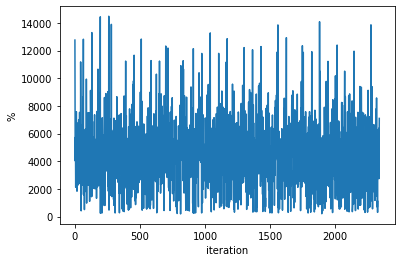

In [10]:
vec2=(orig_comp_step/orig_io_step)*100
plt.plot(vec2)
plt.ylabel("%")
plt.xlabel("iteration")

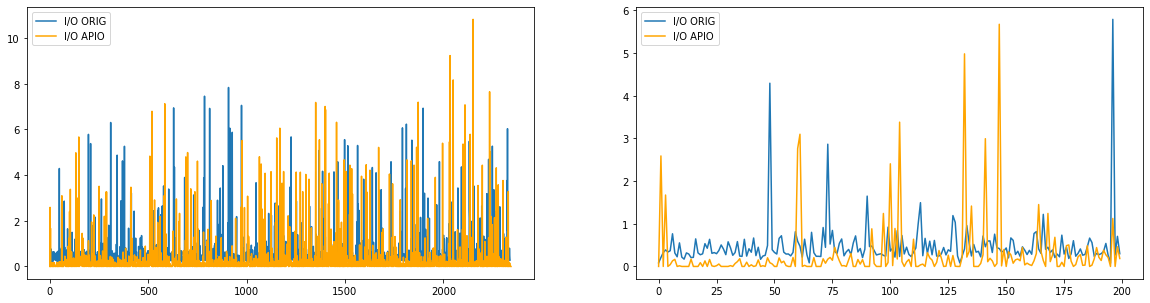

In [11]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].plot(orig_io_step,label="I/O ORIG")
ax[0].plot(apio_io_step,label="I/O APIO",c="orange")
ax[0].legend()
ax[1].plot(orig_io_step[0:200],label="I/O ORIG")
ax[1].plot(apio_io_step[0:200],label="I/O APIO",c="orange")
ax[1].legend()


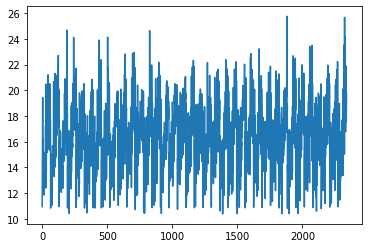

In [12]:
plt.plot(orig_comp_step,label="COMP ORIG")

(0.0, 48.0)

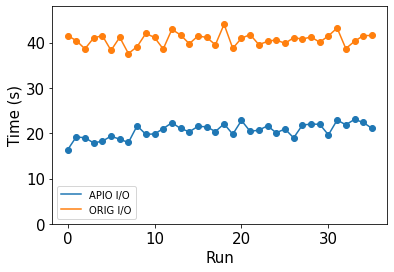

In [13]:
#diff=orig_io-apio_io
#apio_io=apio_io[diff>0]
#orig_io=orig_io[diff>0]
fig,ax=plt.subplots()
ax.plot(apio_io, label="APIO I/O")
ax.scatter(np.linspace(0,35,36),apio_io)
ax.plot(orig_io,label="ORIG I/O")
ax.scatter(np.linspace(0,35,36),orig_io)
ax.legend()
ax.set_ylabel("Time (s)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim(0,48)

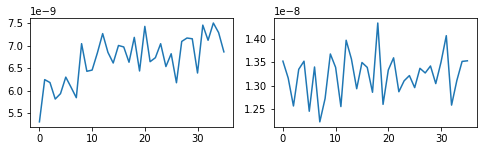

In [14]:
fig,ax=plt.subplots(1,2,figsize=(8,2))
ax[0].plot(apio_io/(32000000*96))
ax[1].plot(orig_io/(32000000*96))

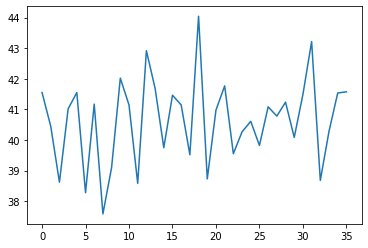

In [15]:
plt.plot(orig_io-apio_io/(32000000*96))

(0.0, 105.0)

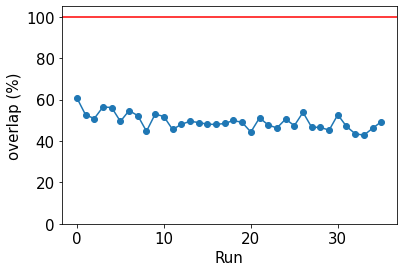

In [16]:
std_orig_io=np.std(orig_io)
std_apio_io=np.std(apio_io)
vec=(orig_io-apio_io)*100/orig_io
fig,ax=plt.subplots()
ax.scatter(np.linspace(0,35,36),vec)
ax.plot(vec)
ax.axhline(100,-1,36,c='red')
ax.set_ylabel("overlap (%)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim(0,105)

In [17]:
vector=vec
print("mean:",np.mean(vector))
print("std:",np.std(vector))
print("max:",np.max(vector))
print("min:",np.min(vector))

mean: 49.41552450749454
std: 3.875409676007023
max: 60.75755807425433
min: 42.80578025729564


In [17]:
avg=[]
err=[]
acc=0
for i in iterno_orig[iterno_orig==no]:
    interval=vec2[acc:acc+int(i)]
    avg.append(sum(interval)/int(i))
    err.append(1.96*(np.std(interval)/np.sqrt(int(i))))
    acc+=int(i)
avg=np.asarray(avg)

In [18]:
avg
len(avg)

36

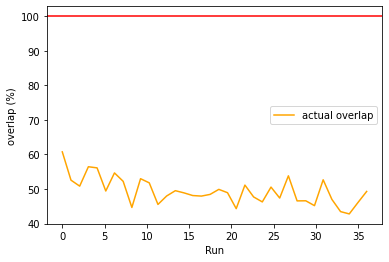

In [19]:
fig,ax=plt.subplots()
x=np.linspace(0,len(avg),len(avg))
#ax.plot(x,avg,label="average max overlap")
#ax.fill_between(x, avg-err, avg+err)
ax.plot(x, vec,c="orange",label="actual overlap")
ax.set_ylabel("overlap (%)")
ax.set_xlabel("Run")
ax.legend()
ax.axhline(100,0,16,c="r")